In [53]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [54]:
a_renomear = {
    'unfinished' : 'nao_finalizado',
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco'
}

dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [55]:
troca = {
    0 : 1,
    1 : 0
}

dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='horas_esperadas', ylabel='preco'>

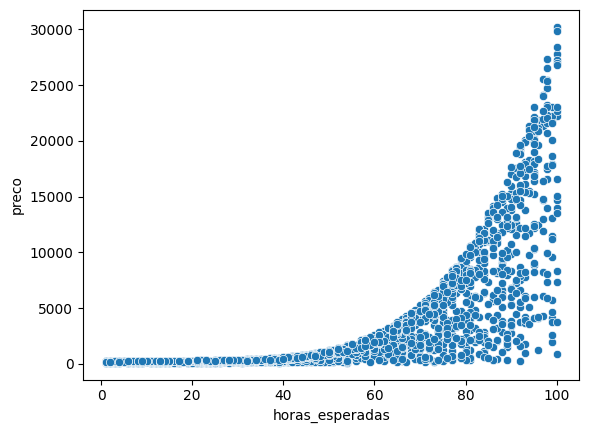

In [56]:
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='preco', data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

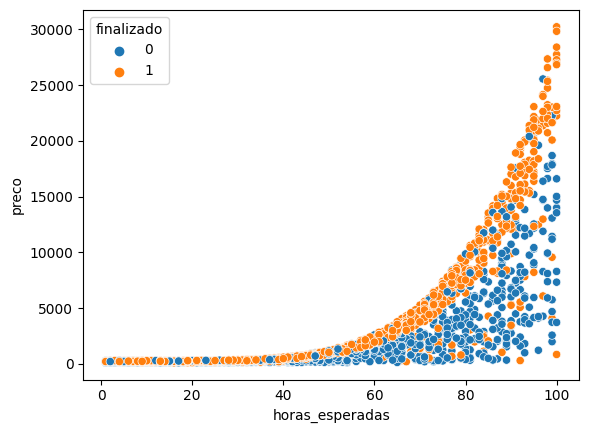

In [57]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=dados)

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


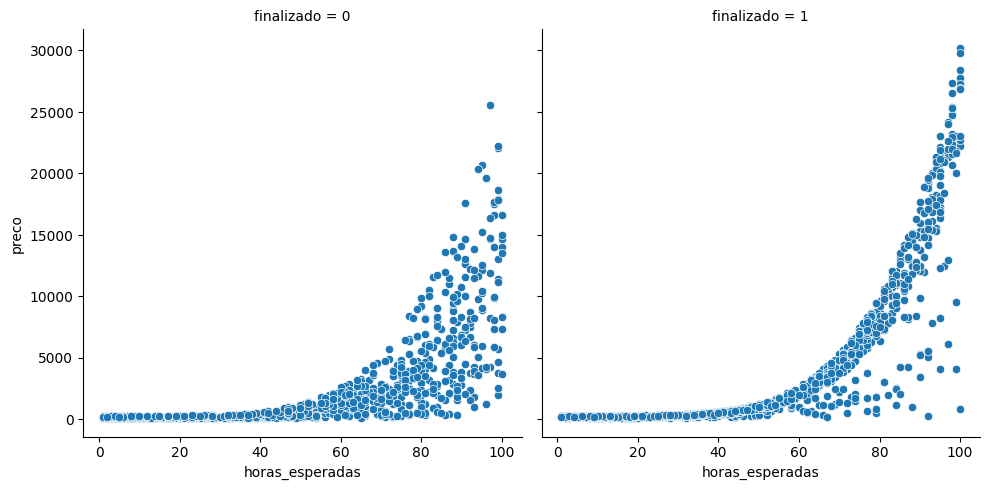

In [58]:
sns.relplot(x='horas_esperadas', y='preco', col='finalizado', data=dados)

In [59]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5

# Dividindo os dados em treino e teste
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=SEED ,test_size=0.3, stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("A acurácia foi %.2f%%" % accuracy)

Treinaremos com 1509 elementos e testaremos com 648 elementos
A acurácia foi 53.55%


c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [61]:
import numpy as np

minhasPrevisoes = np.ones(648)
accuracy = accuracy_score(test_y, minhasPrevisoes) * 100
print("Baseline accuracy: %.2f%%" % accuracy)

Baseline accuracy: 52.62%


<Axes: xlabel='horas_esperadas', ylabel='preco'>

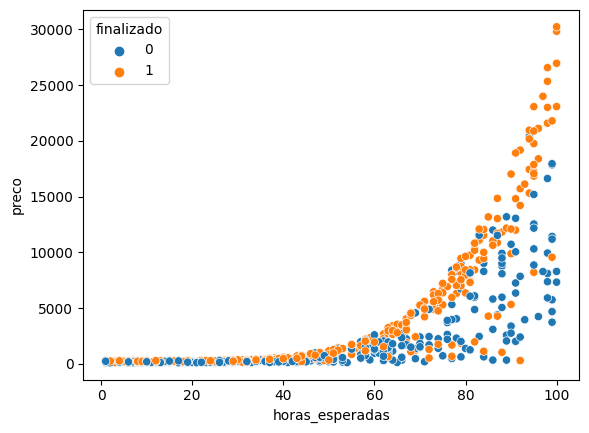

In [62]:
sns.scatterplot(x='horas_esperadas', y='preco', hue=test_y, data=test_x)

In [63]:
x_min = test_x.horas_esperadas.min()
x_max = test_x.horas_esperadas.max()
y_min = test_x.preco.min()
y_max = test_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [64]:
pixels = 100
eixoX = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixoY = np.arange(y_min, y_max, (y_max - y_min)/pixels)


In [65]:
xx, yy = np.meshgrid(eixoX, eixoY)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [66]:
z= model.predict(pontos)
z= z.reshape(xx.shape)
z

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

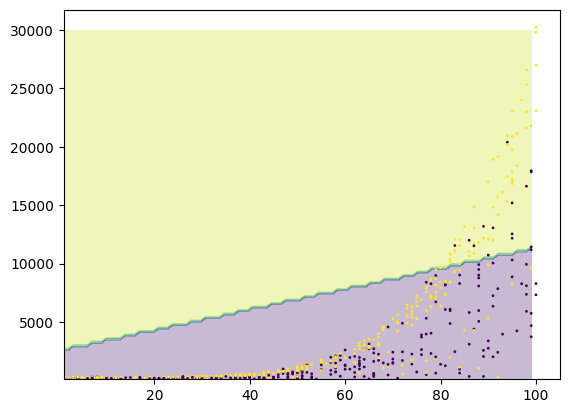

In [67]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(test_x.horas_esperadas, test_x.preco, c=test_y, s=1)
